Please run those two cells before running the Notebook!

As those plotting settings are standard throughout the book, we do not show them in the book every time we plot something.

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

# Chapter 5 - Technical Analysis and Building Interactive Dashboards

## 5.1 Calculating the most popular technical indicators

### How to do it...

1. Import the libraries:

In [17]:
import pandas as pd 
import yfinance as yf
import talib

2. Download IBM's stock prices from 2020:

In [18]:
df = yf.download("IBM", 
                 start="2020-01-01", 
                 end="2020-12-31",
                 progress=False,
                 auto_adjust=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,105.019597,105.735291,104.840679,105.346329,3293436
2020-01-03,103.907181,104.910707,103.899402,104.506187,2482890
2020-01-06,103.790489,104.428383,103.619344,104.319481,2537073
2020-01-07,104.000525,104.988487,103.774929,104.389481,3232977
2020-01-08,104.638436,105.688635,104.179459,105.260773,4545916
...,...,...,...,...,...
2020-12-23,101.423064,102.511966,101.308444,101.439438,2817819
2020-12-24,102.340034,102.421908,101.693247,102.086227,1842111
2020-12-28,102.421905,103.649981,101.897925,102.192665,3781499


3. Calculate and plot the Simple Moving Average:

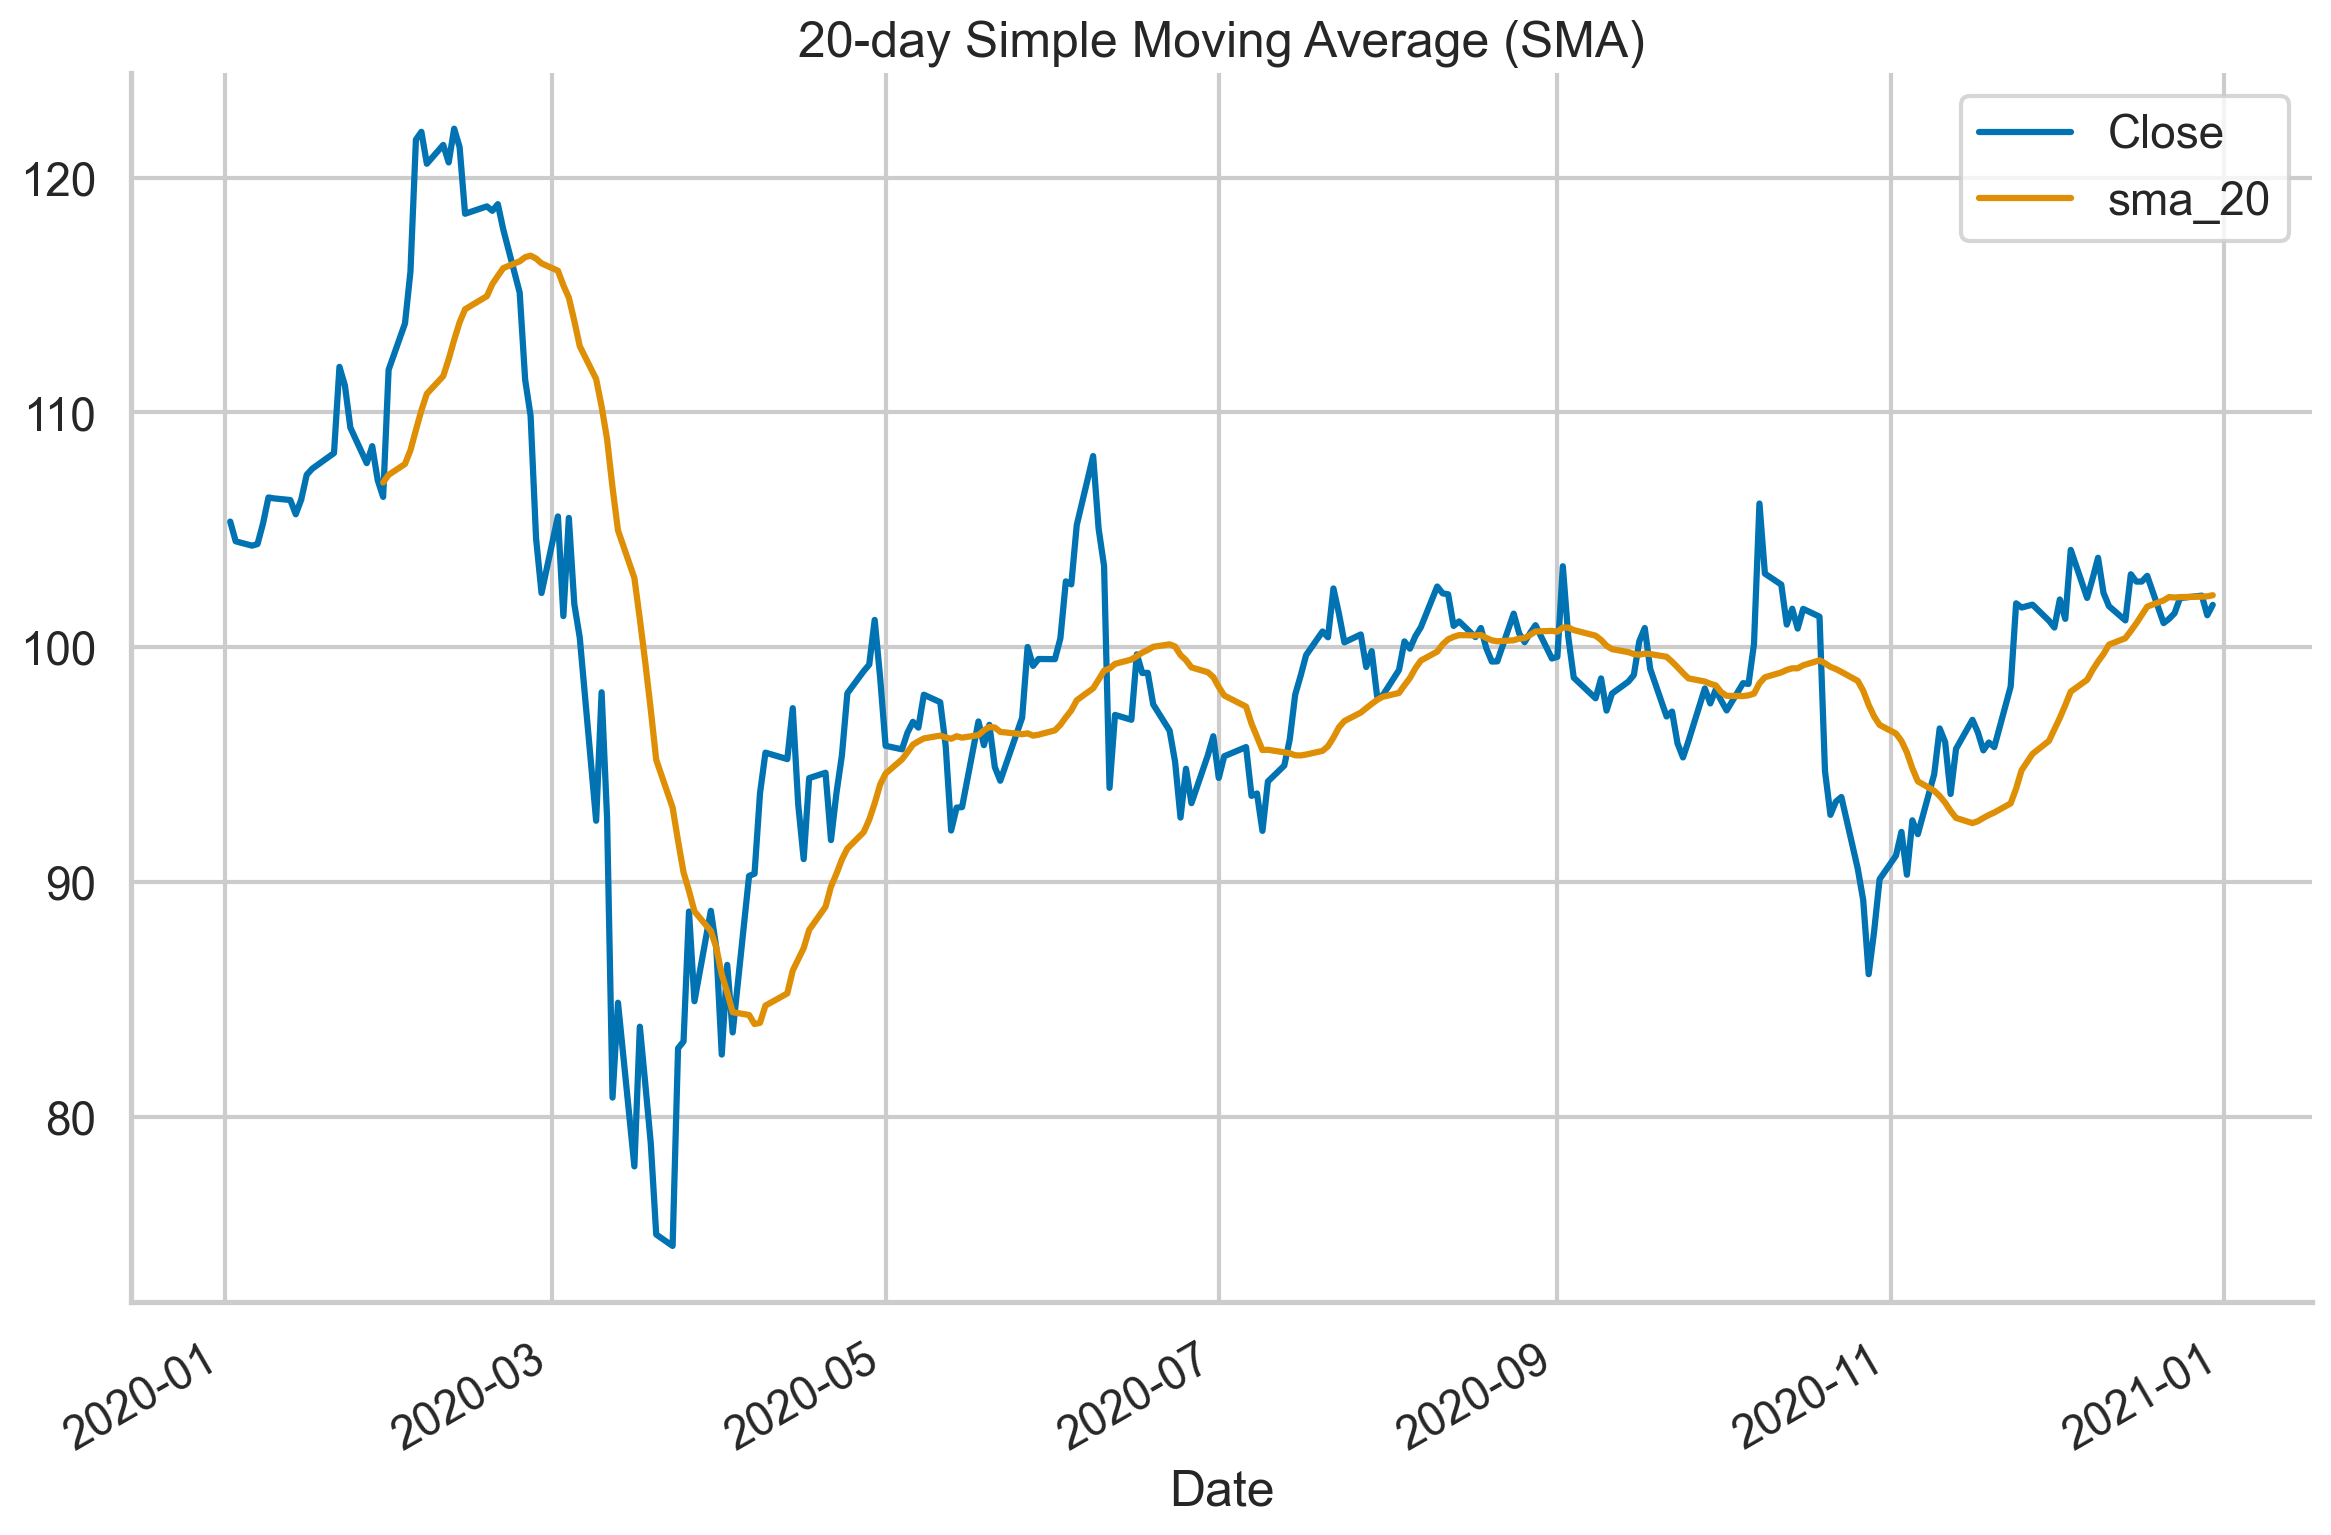

In [19]:
df["sma_20"] = talib.SMA(df["Close"], timeperiod=20)
(
    df[["Close", "sma_20"]]
    .plot(title="20-day Simple Moving Average (SMA)")
)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_1", dpi=200)

4. Calculate and plot the Bollinger bands:

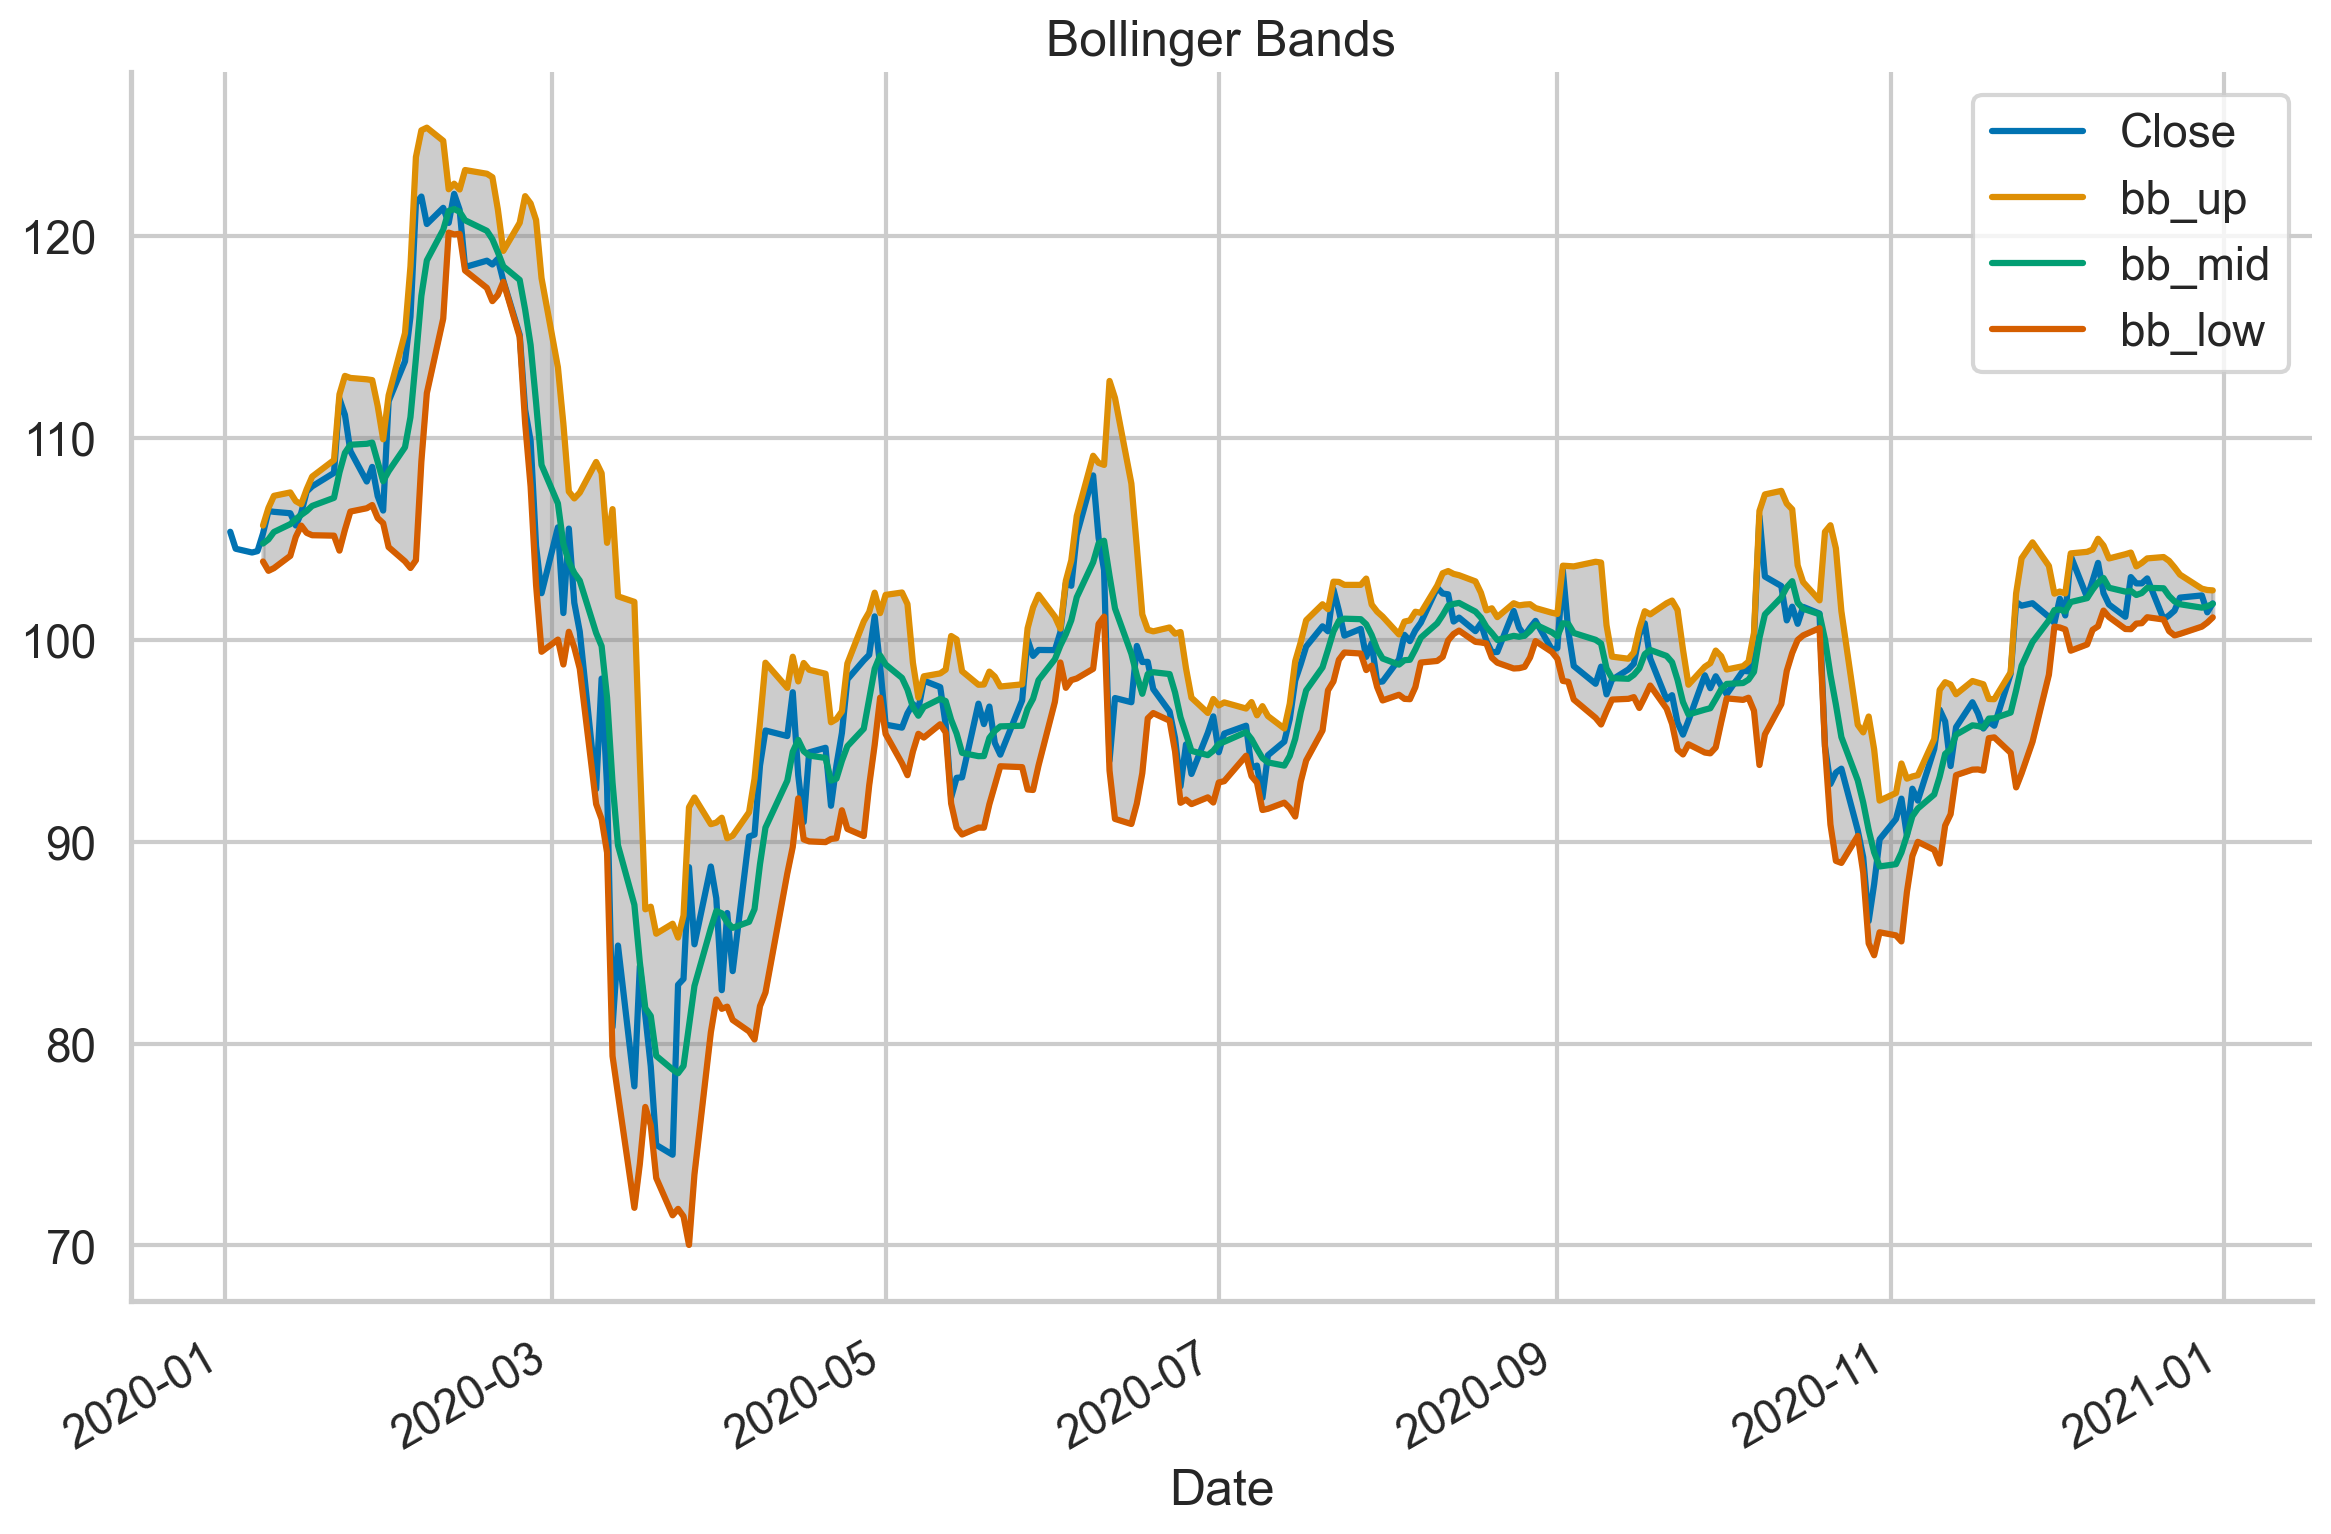

In [20]:
df["bb_up"], df["bb_mid"], df["bb_low"] = talib.BBANDS(df["Close"])

fig, ax = plt.subplots()

(
    df.loc[:, ["Close", "bb_up", "bb_mid", "bb_low"]]
    .plot(ax=ax, title="Bollinger Bands")
)

ax.fill_between(df.index, df["bb_low"], df["bb_up"], 
                color="gray", 
                alpha=.4)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_2", dpi=200)

5. Calculate and plot the RSI:

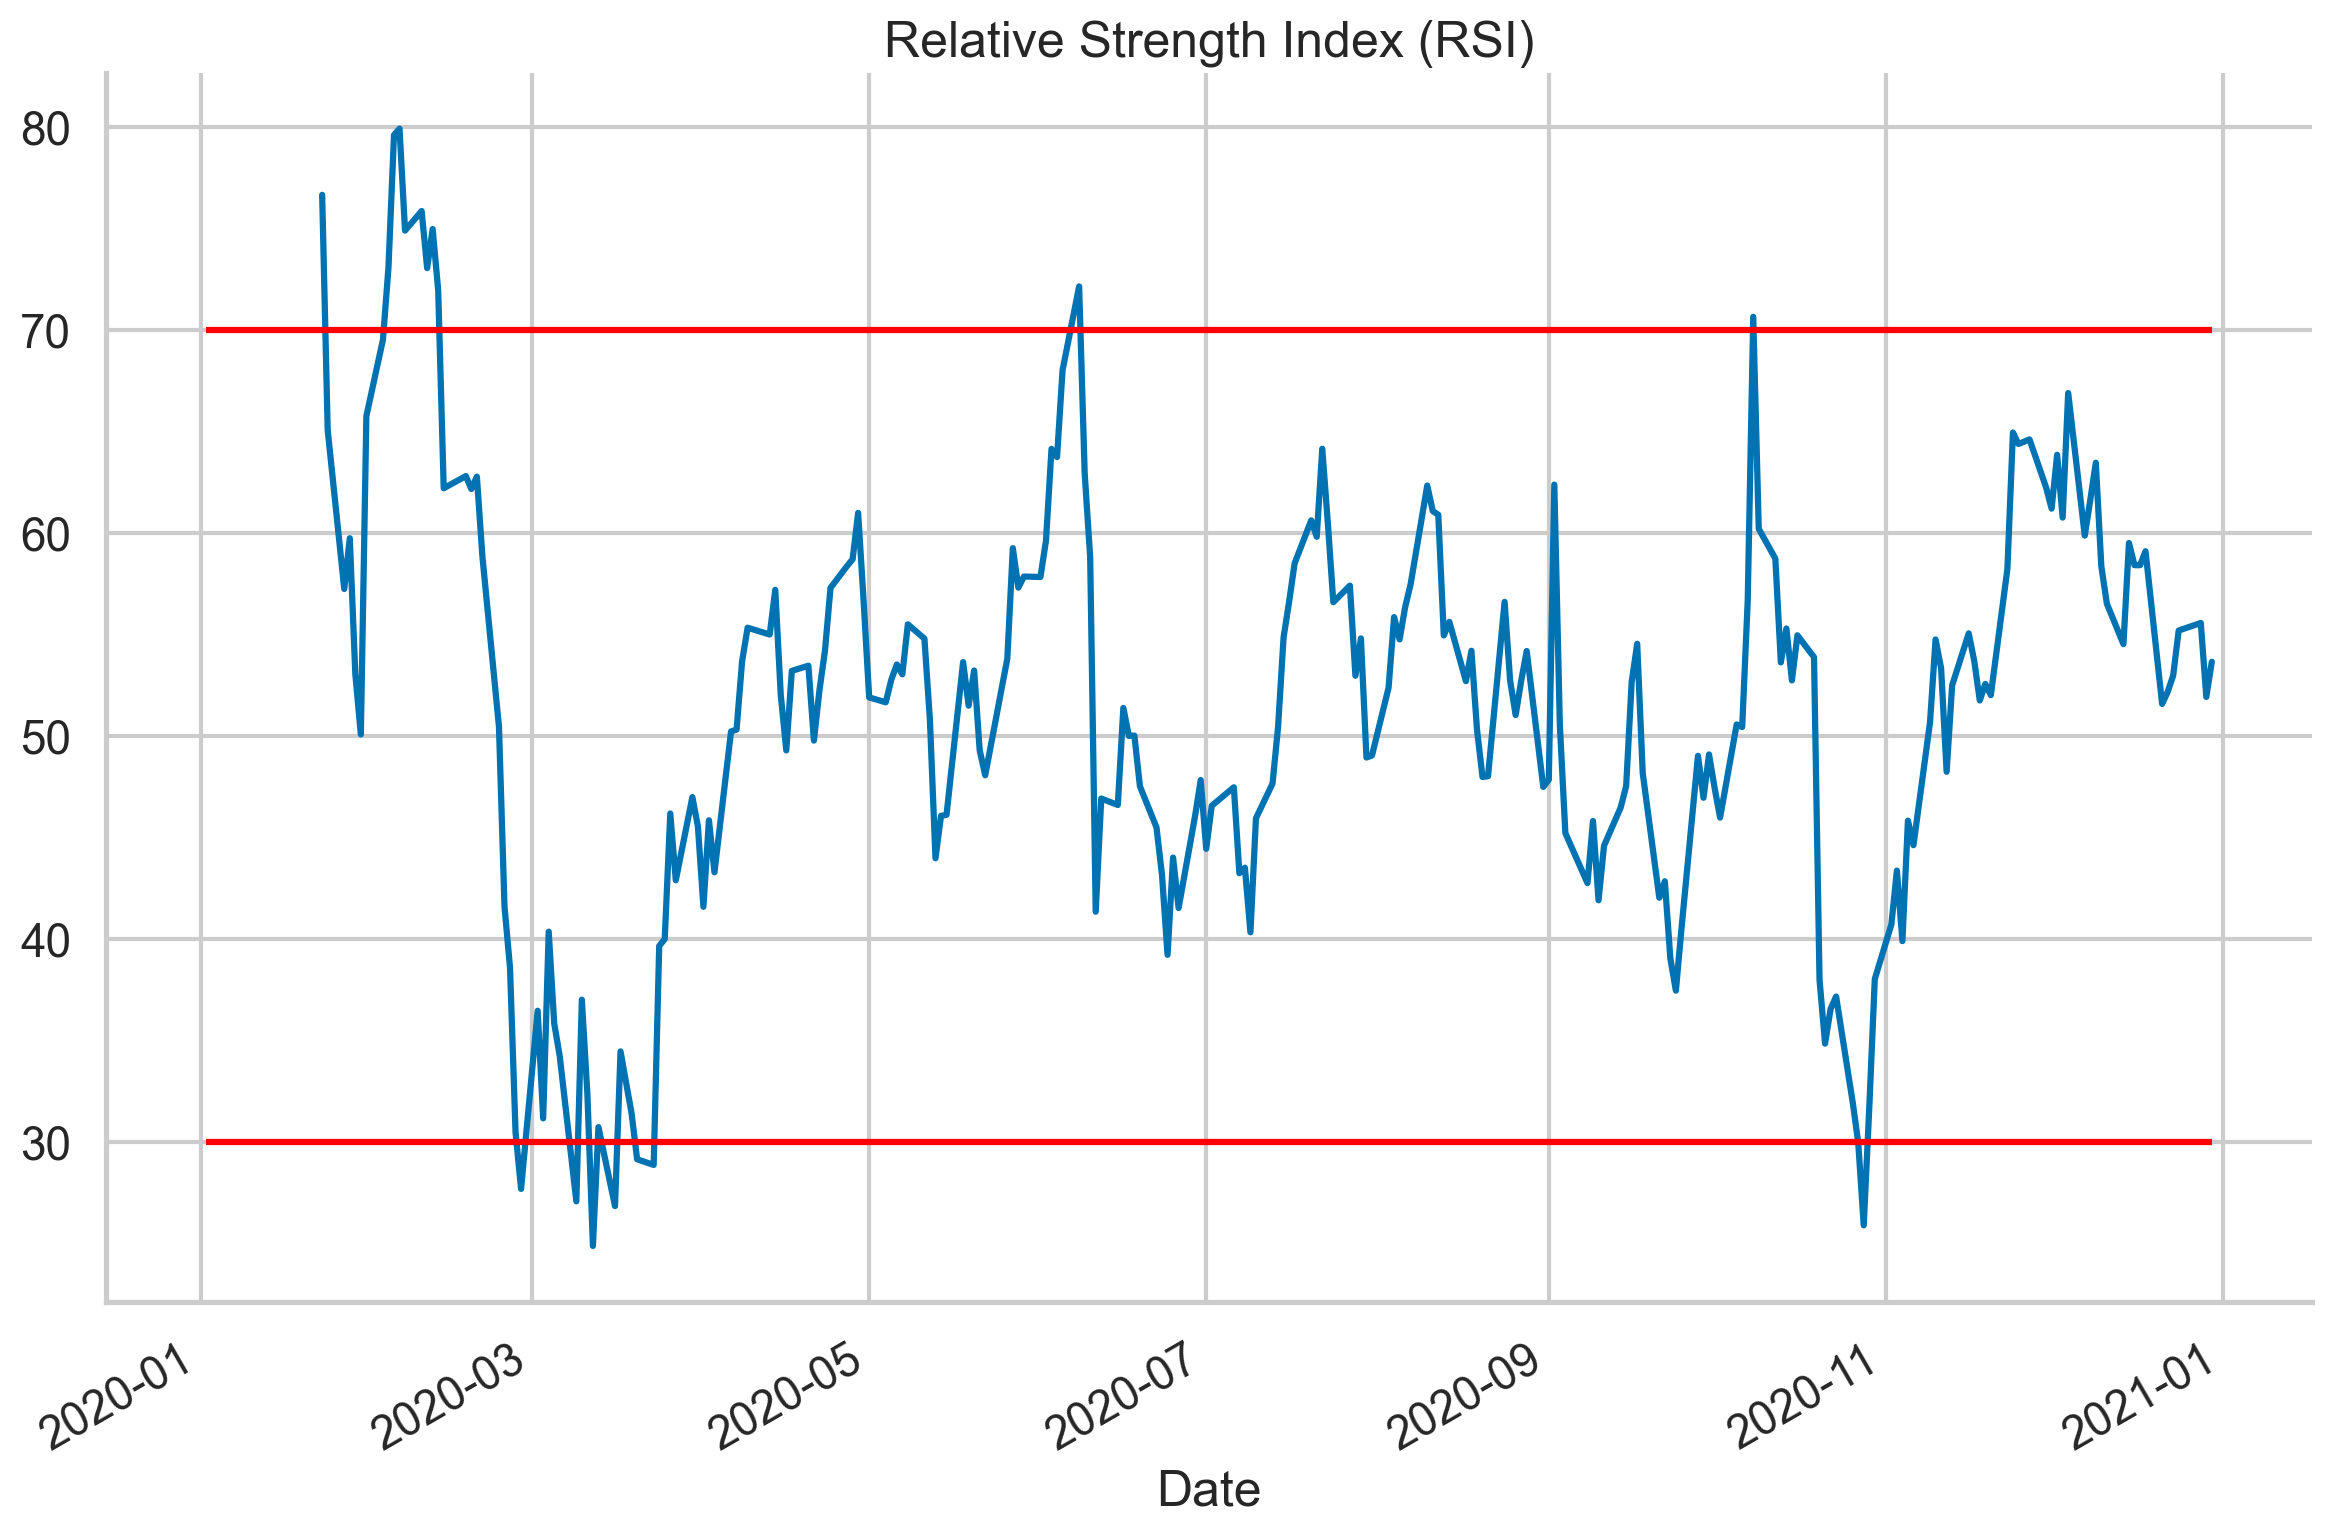

In [21]:
df["rsi"] = talib.RSI(df["Close"])

fig, ax = plt.subplots()
df["rsi"].plot(ax=ax, 
               title="Relative Strength Index (RSI)")
ax.hlines(y=30, 
          xmin=df.index.min(), 
          xmax=df.index.max(), 
          color="red")
ax.hlines(y=70, 
          xmin=df.index.min(), 
          xmax=df.index.max(), 
          color="red")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_3", dpi=200)

6. Calculate and plot the MACD:

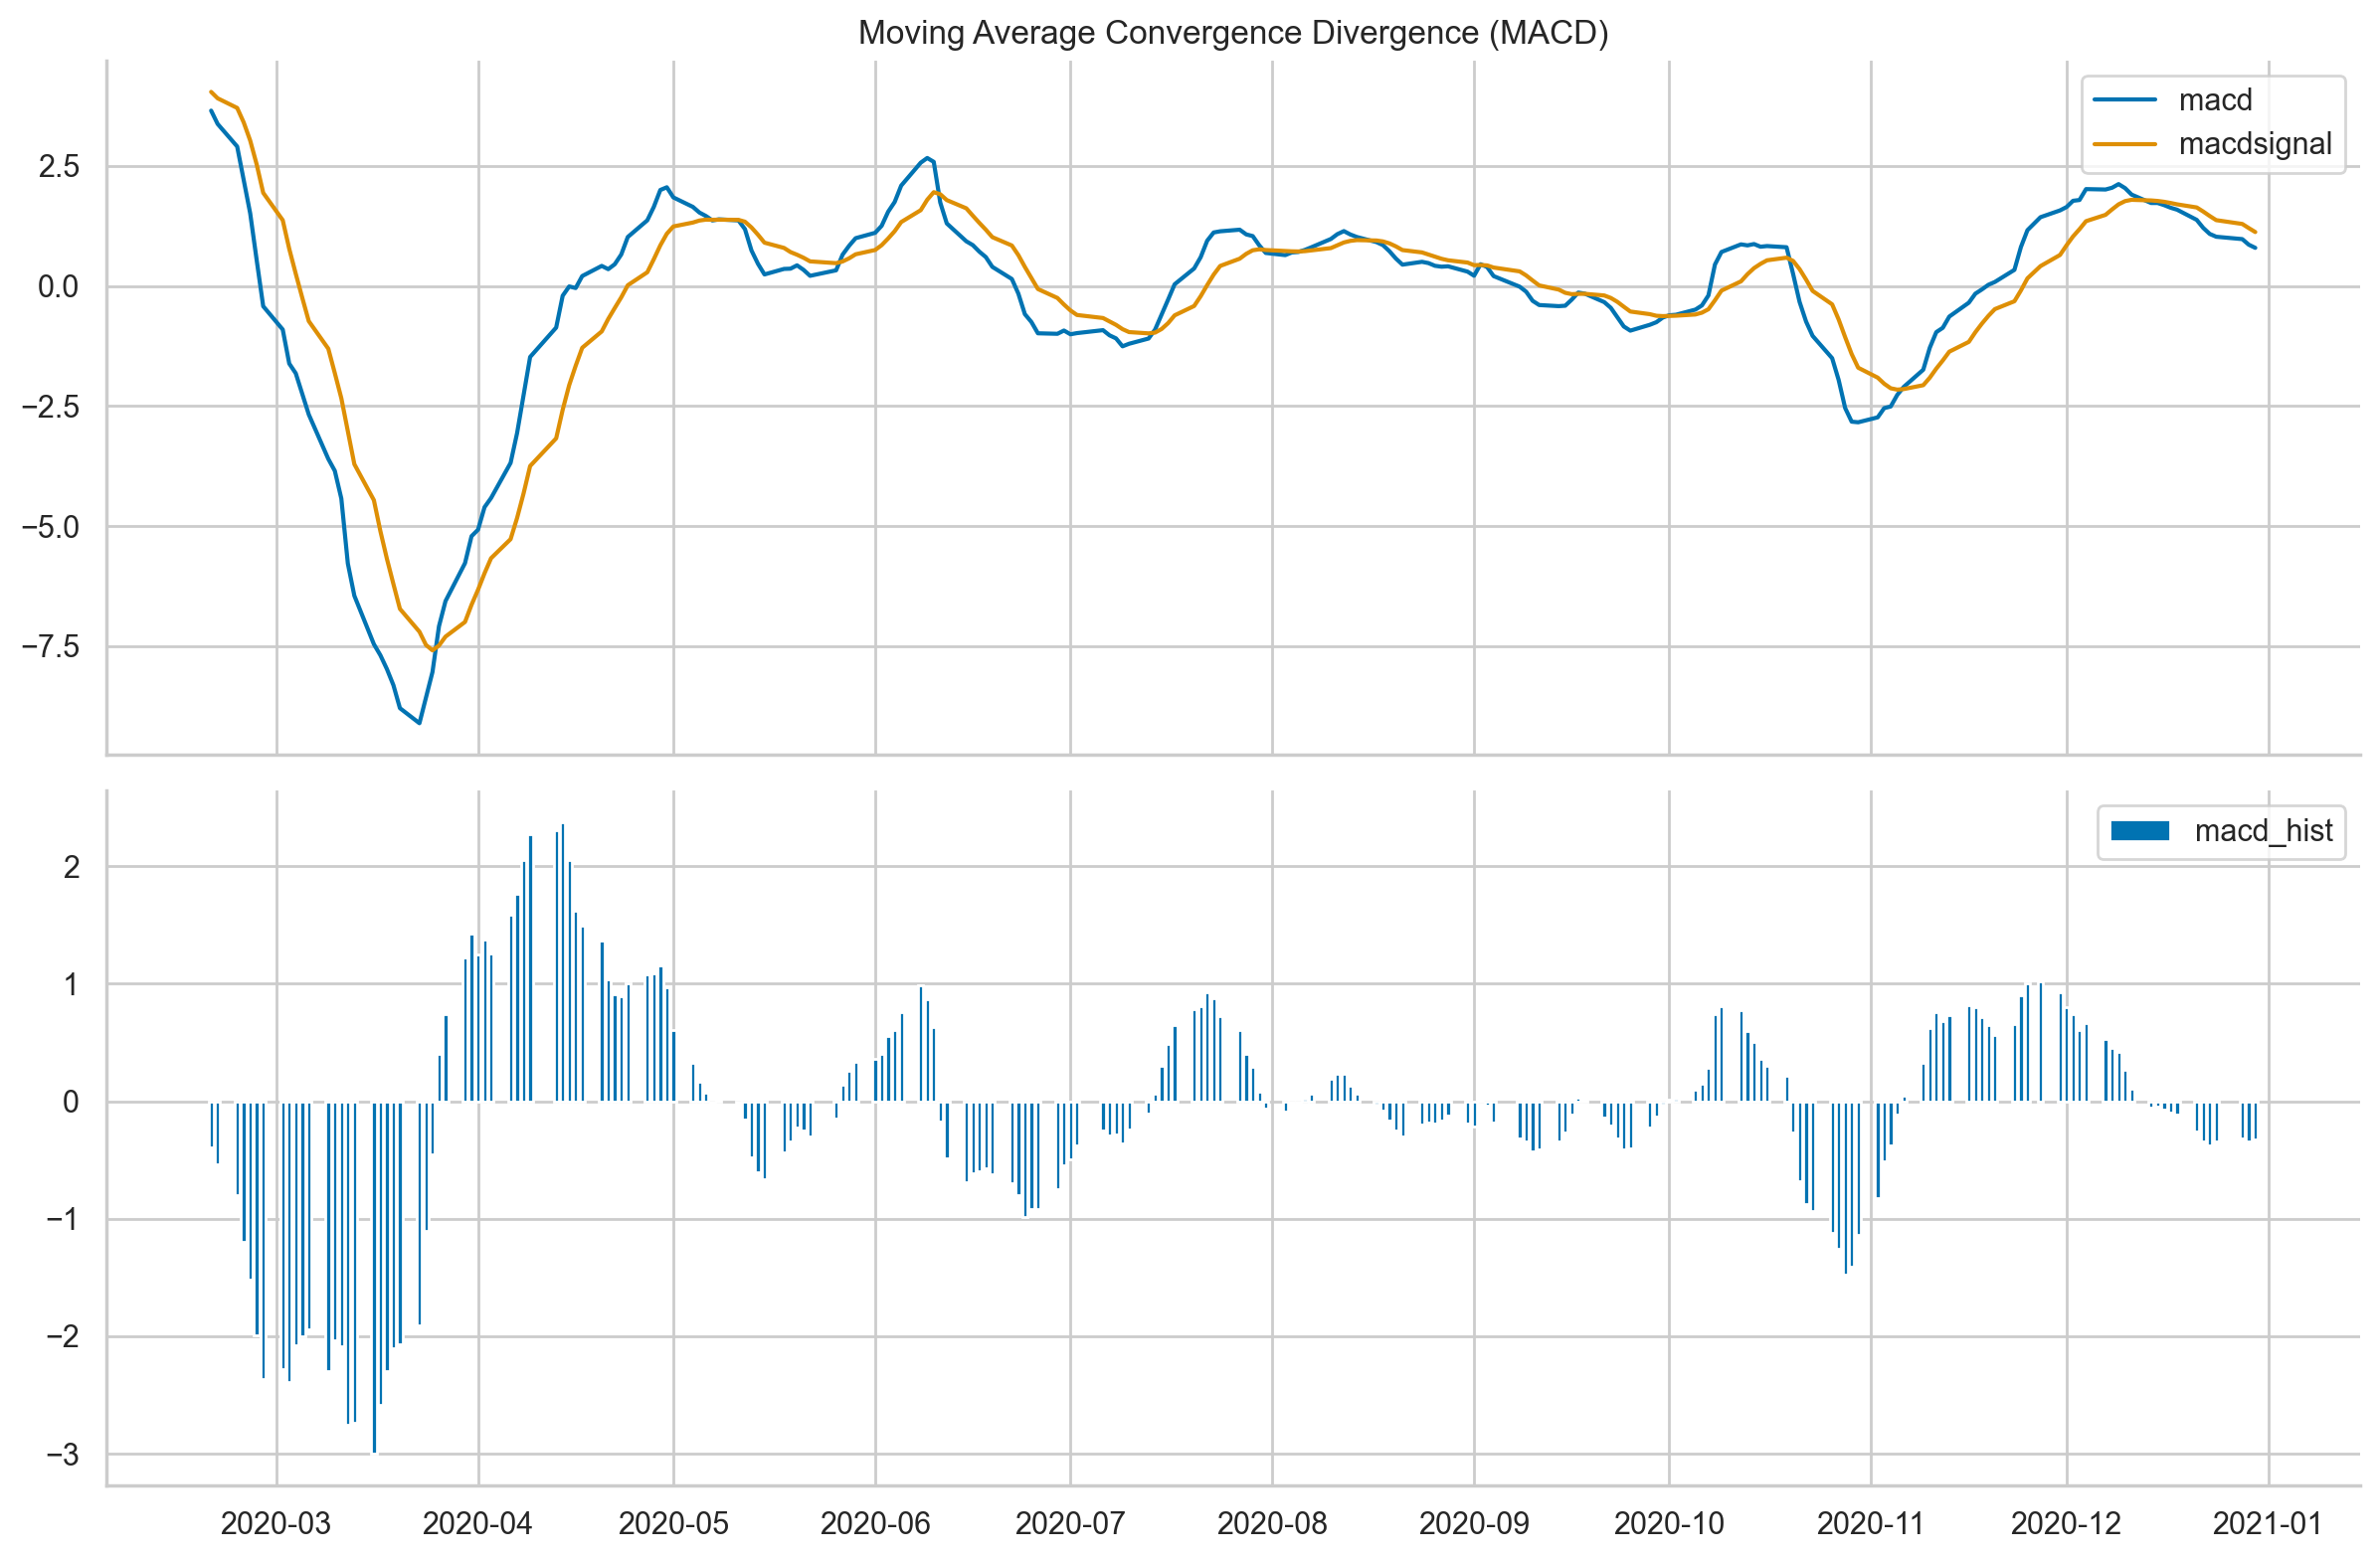

In [22]:
df["macd"], df["macdsignal"], df["macdhist"] = talib.MACD(
    df["Close"], fastperiod=12, slowperiod=26, signalperiod=9
)

with sns.plotting_context("notebook"):
    fig, ax = plt.subplots(2, 1, sharex=True)

    (
        df[["macd", "macdsignal"]].
        plot(ax=ax[0],
             title="Moving Average Convergence Divergence (MACD)")
    )
    ax[1].bar(df.index, df["macdhist"].values, label="macd_hist")
    ax[1].legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_5_4", dpi=200)


### There's more

1. Import the libraries:

In [23]:
from ta import add_all_ta_features


2. Discard the previously calculated indicators and keep only the required columns:

In [24]:
df = df[["Open", "High", "Low", "Close", "Volume"]].copy()

3. Calculate all the technical indicators available in the `ta` library:

In [25]:
df = add_all_ta_features(df, open="Open", high="High", 
                         low="Low", close="Close", 
                         volume="Volume")

In [26]:
df.shape

(252, 91)

In [27]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
       'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base

## 5.3 Recognizing candlestick patterns

### How to do it...

1. Import the libraries:

In [28]:
import pandas as pd 
import yfinance as yf
import talib
import mplfinance as mpf

2. Download Bitcoin's hourly prices from the last 3 months:

In [29]:
df = yf.download("BTC-USD", 
                 period="9mo",
                 interval="1h",
                 progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-05-22 09:00:00+00:00,26831.113281,26889.103516,26831.113281,26865.373047,26865.373047,0
2023-05-22 10:00:00+00:00,26866.398438,26879.330078,26807.982422,26832.648438,26832.648438,0
2023-05-22 11:00:00+00:00,26833.003906,26838.462891,26779.464844,26826.154297,26826.154297,0
2023-05-22 12:00:00+00:00,26829.978516,26852.205078,26744.351562,26750.769531,26750.769531,0
2023-05-22 13:00:00+00:00,26743.357422,27045.734375,26714.177734,27016.169922,27016.169922,670828544
...,...,...,...,...,...,...
2024-02-22 05:00:00+00:00,51427.164062,51642.664062,51427.164062,51495.925781,51495.925781,102756352
2024-02-22 06:00:00+00:00,51501.515625,51766.093750,51501.515625,51764.281250,51764.281250,897024
2024-02-22 07:00:00+00:00,51744.445312,51875.796875,51648.703125,51799.722656,51799.722656,207054848


3. Identify the "Three Line Strike" pattern:

In [30]:
df["3_line_strike"] = talib.CDL3LINESTRIKE(
    df["Open"], df["High"], df["Low"], df["Close"]
)

4. Locate and plot the bearish pattern:

In [31]:
df[df["3_line_strike"] == -100].head().round(2)

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2023-05-23 01:00:00+00:00,26821.62,27083.51,26816.18,26998.26,26998.26,571061248,-100
2023-06-04 06:00:00+00:00,27042.96,27142.12,27041.88,27133.54,27133.54,105805824,-100
2023-06-09 12:00:00+00:00,26617.03,26697.81,26617.03,26672.18,26672.18,0,-100
2023-06-19 11:00:00+00:00,26373.24,26439.05,26370.62,26439.05,26439.05,78783488,-100
2023-07-10 02:00:00+00:00,30059.54,30235.08,30059.54,30217.31,30217.31,108592640,-100


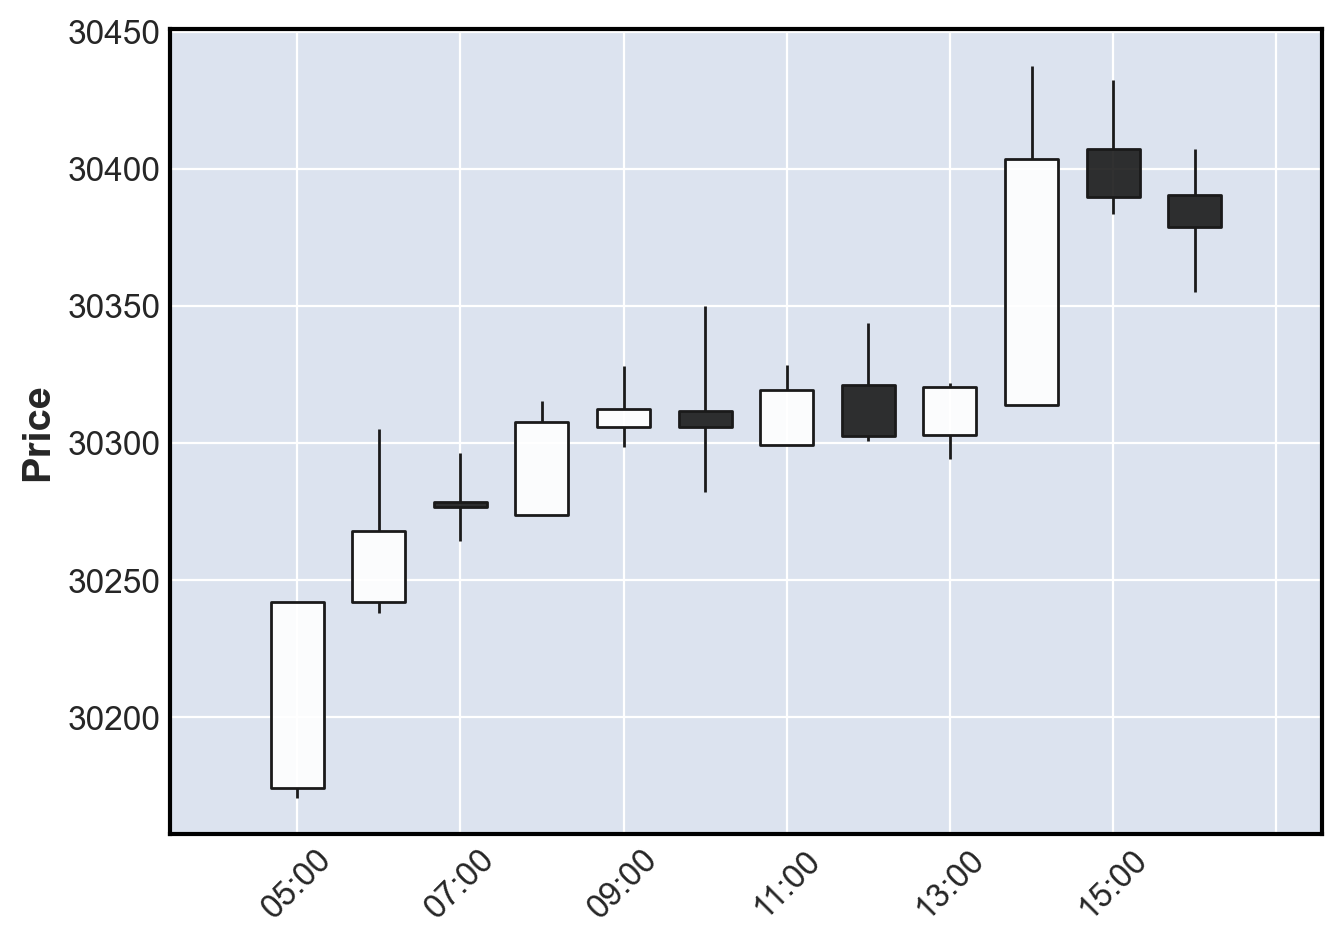

In [32]:
mpf.plot(df["2023-07-16 05:00:00":"2023-07-16 16:00:00"], 
         type="candle")

5. Locate and plot the bullish pattern:

In [33]:
df[df["3_line_strike"] == 100].head().round(2)

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2023-06-12 12:00:00+00:00,25991.80,25991.80,25912.51,25930.69,25930.69,41630720,100
2023-07-08 18:00:00+00:00,30264.95,30264.95,30202.94,30205.38,30205.38,0,100
2023-07-16 23:00:00+00:00,30338.71,30338.71,30171.79,30250.34,30250.34,264502784,100
2023-08-10 11:00:00+00:00,29519.91,29523.74,29462.47,29470.03,29470.03,0,100
2023-08-30 06:00:00+00:00,27464.55,27464.55,27379.30,27386.76,27386.76,99358720,100


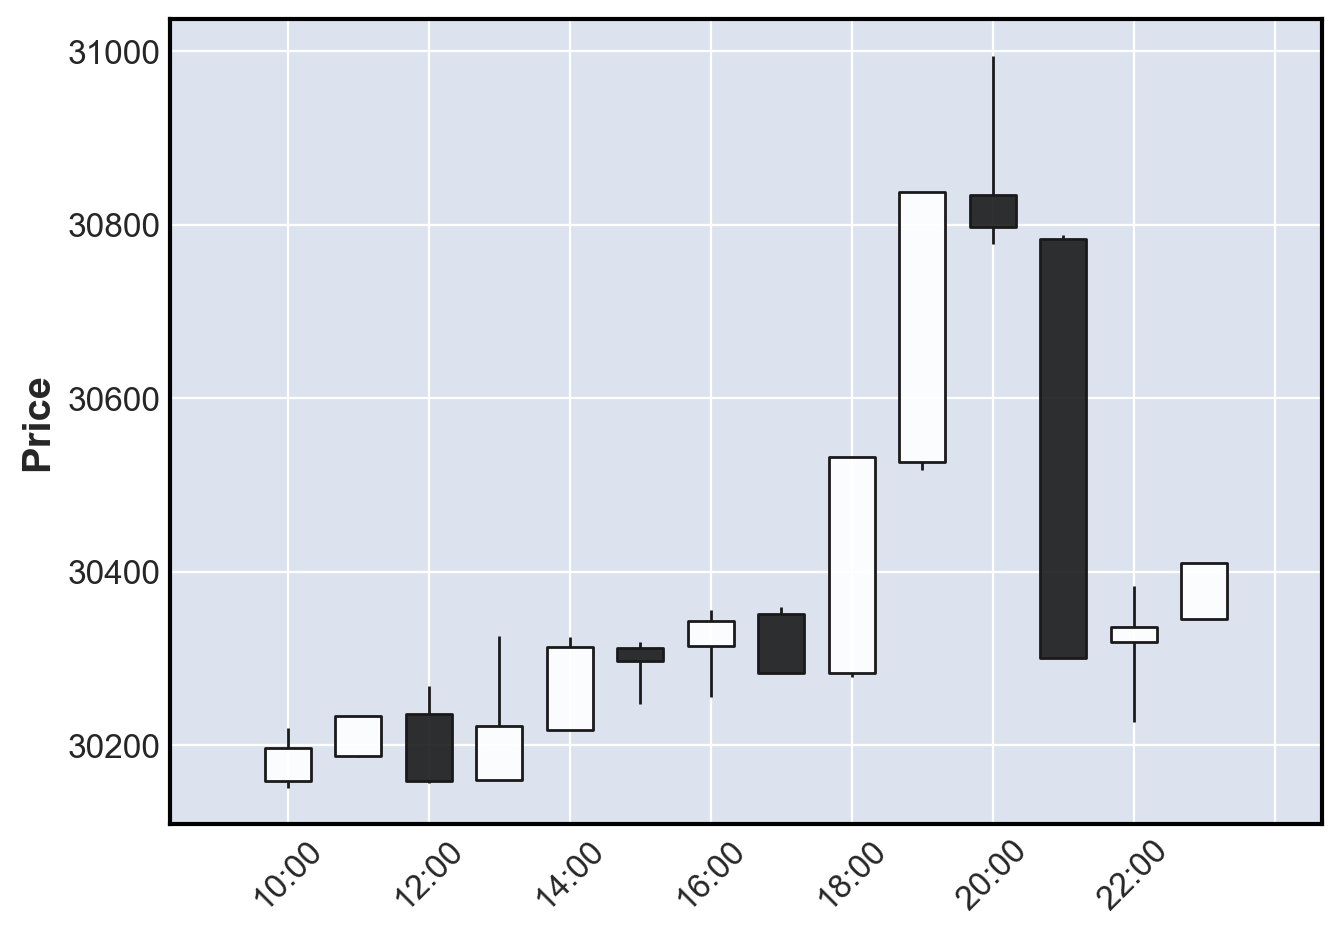

In [34]:
mpf.plot(df["2023-07-10 10:00:00":"2023-07-10 23:00:00"], 
         type="candle")

1. Get all available pattern names:

In [35]:
candle_names = talib.get_function_groups()["Pattern Recognition"]

2. Iterate over the list of patterns and try identifying them all:

In [36]:
for candle in candle_names:
    df[candle] = getattr(talib, candle)(df["Open"], df["High"], 
                                        df["Low"], df["Close"])

3. Inspect the summary statistics of the patterns:

In [37]:
with pd.option_context("display.max_rows", len(candle_names)):
    display(df[candle_names].describe().transpose().round(2))

,count,mean,std,min,25%,50%,75%,max
CDL2CROWS,6624.0,-0.03,1.74,-100.0,0.0,0.0,0.0,0.0
CDL3BLACKCROWS,6624.0,-0.03,1.74,-100.0,0.0,0.0,0.0,0.0
CDL3INSIDE,6624.0,0.03,11.40,-100.0,0.0,0.0,0.0,100.0
CDL3LINESTRIKE,6624.0,-0.06,6.73,-100.0,0.0,0.0,0.0,100.0
CDL3OUTSIDE,6624.0,-0.50,23.98,-100.0,0.0,0.0,0.0,100.0
CDL3STARSINSOUTH,6624.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDL3WHITESOLDIERS,6624.0,0.17,4.07,0.0,0.0,0.0,0.0,100.0
CDLABANDONEDBABY,6624.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDLADVANCEBLOCK,6624.0,-1.06,10.23,-100.0,0.0,0.0,0.0,0.0
CDLBELTHOLD,6624.0,0.63,43.47,-100.0,0.0,0.0,0.0,100.0


4. Locate and plot the "Evening Star" pattern:

In [38]:
df[df["CDLEVENINGSTAR"]  == -100].head()

,Open,High,Low,Close,Adj Close,Volume,3_line_strike,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-06-01 00:00:00+00:00,27218.412109,27346.105469,27048.951172,27062.232422,27062.232422,577002496,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-07-03 04:00:00+00:00,30759.115234,30789.113281,30683.988281,30683.988281,30683.988281,152043520,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-07-08 18:00:00+00:00,30264.947266,30264.947266,30202.941406,30205.380859,30205.380859,0,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-08-02 12:00:00+00:00,29547.423828,29581.294922,29461.578125,29461.578125,29461.578125,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-08-09 09:00:00+00:00,29823.207031,29823.644531,29773.669922,29773.906250,29773.906250,111867904,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


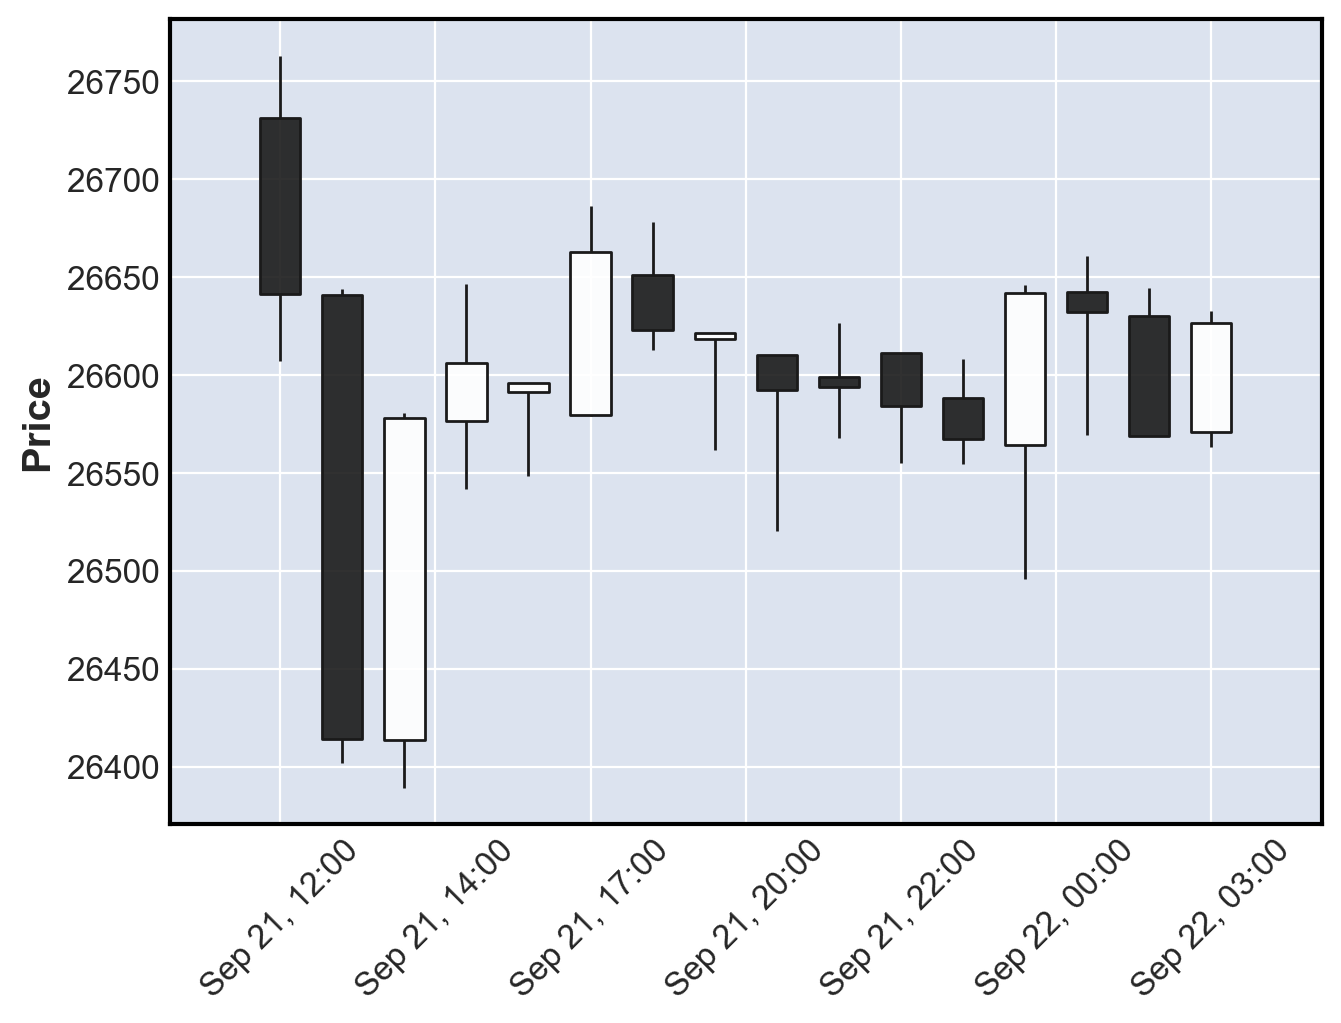

In [39]:
mpf.plot(df["2023-09-21 12:00:00":"2023-09-22 03:00:00"], type="candle")